# Shape Sensing usign four-core fiber sensors 

* Strain depends on distance to the neutral axis and position 


With no external force strain applied to a fiber (assuming constant bending along the fiber) is: $$ \epsilon_i ^0 = \frac{ \Delta_l}{  l_0} = \frac{l_d - l_0}{l_0} = \frac{r_i \alpha - r \alpha}{r \alpha} $$ 
where: 
 - $l_0$ is the initial length,
 - $ l_d$ the length after deformation
 -  $\epsilon_0$ the strain on the fiber
 - r is the distance from the neutral axis to the curvature centre
 - $r_i$  the distance from fiber i to the curvature centre. 
 - $\alpha$ angulo entre los planos que definen la sección de la fibra 

 When forced to maintain curvature the applied strain is: 
 $$\epsilon_F = \frac{\sigma}{E} =  \frac{\sigma F }{E} =  \frac{r \alpha ^\prime  - r \alpha}{r \alpha}  $$
Where: $\alpha^\prime = \alpha (\epsilon_F + 1) $

 - E Young Modulus 
 - 


 $\epsilon_ i = \frac{r_i}{r}(\epsilon_F + 1)- 1 $







 ### Paper 2: 
 $$ \epsilon_i =  - \kappa r_i \cos(\theta_b - \frac{3\pi}{2} - \theta_i )$$ 

 $$\kappa _{app} = - \sum ^N \frac{\epsilon_i }{r_i}\cos\theta_i \bf{j} - \sum ^N \frac{\epsilon_i }{r_i}\sin\theta_i \bf{k} $$

$$\kappa = \frac{2 |\kappa _{app}|}{N}$$

$$ \theta = angle( \bf{\kappa _{app}}) $$ 

### Inputs: 

La barra mide 2.8 metros, los sensores están a 0.15 m  metros de los bordes y la distancia entre sensores es 0.25 m 

In [ ]:
import numpy as np 
import scipy as sp 
import math  


a = [[0, 0,	0,	0	,0	,0	,0,	0,	0	,0	,0	,0, 0], 

[0, -29.2314,	-91.1457,	-151.6907,	-210.2951,	-266.1124,	-364.9766,	-277.3659,	-214.5882,	-153.3675,	-95.3845,	-32.9161,0],
[0, 0,	0,	0,	0,	0	,0,	0,	0	,0	,0,	0, 0 ]
, [0, 35.8284,	95.3362,	155.0938,	214.9890,	274.8244,	320.1086,	286.4778,	221.0992	,158.4492	,97.5707,	37.9462,0]]

a  = np.array(a).T.tolist()
a 

[[0.0, 0.0, 0.0, 0.0],
 [0.0, -29.2314, 0.0, 35.8284],
 [0.0, -91.1457, 0.0, 95.3362],
 [0.0, -151.6907, 0.0, 155.0938],
 [0.0, -210.2951, 0.0, 214.989],
 [0.0, -266.1124, 0.0, 274.8244],
 [0.0, -364.9766, 0.0, 320.1086],
 [0.0, -277.3659, 0.0, 286.4778],
 [0.0, -214.5882, 0.0, 221.0992],
 [0.0, -153.3675, 0.0, 158.4492],
 [0.0, -95.3845, 0.0, 97.5707],
 [0.0, -32.9161, 0.0, 37.9462],
 [0.0, 0.0, 0.0, 0.0]]

In [ ]:
Datos2 = np.array([[ 0 , - 88.8 , -88.74 , 0 ], 
                   [ 0 , -104.47, -104.5, 0  ],
                   [ 0 , 104.47, 104.5 , 0 ],
                   [0, 88.8 , 88.74 , 0 ]
                   ])
Datos2 = Datos2.T
posiciones = [0, 6.265 , 15.215, 21.48]

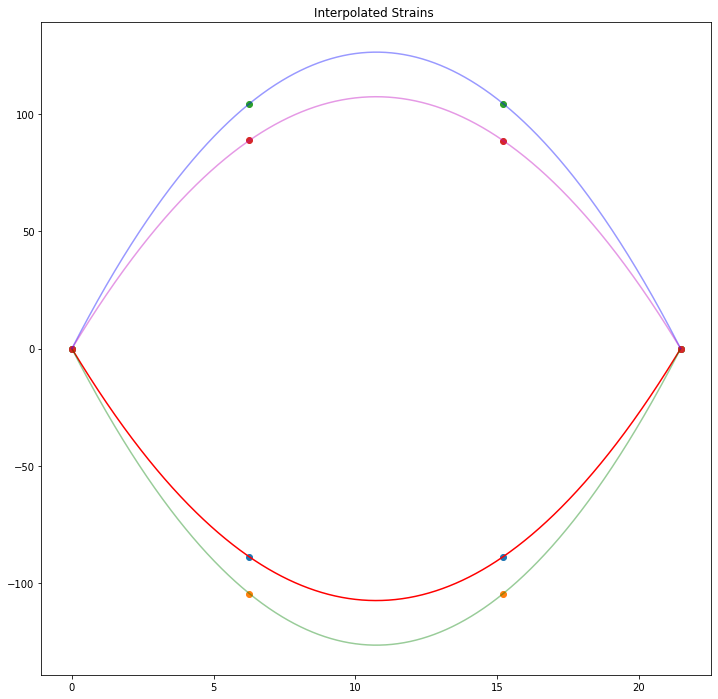

In [ ]:
e_1 , e_2, e_3, e_4 = [],[],[],[]
for i in range(0, len(Datos2[0:])):
  e_1.append(Datos2[i][0]) , e_2.append(Datos2[i][1]) , e_3.append(Datos2[i][2]), e_4.append(Datos2[i][3])

from scipy import interpolate
interp_strains1 = interpolate.interp1d(posiciones, e_1, kind='cubic')
interp_strains2 = interpolate.interp1d(posiciones, e_2, kind='cubic')
interp_strains3 = interpolate.interp1d(posiciones, e_3, kind='cubic')
interp_strains4 = interpolate.interp1d(posiciones, e_4, kind='cubic')

x = np.linspace(posiciones[0],21.48, 10**3)

e_1p, e_2p, e_3p, e_4p = interp_strains1(x), interp_strains2(x), interp_strains3(x) , interp_strains4(x)

import matplotlib.pyplot as plt 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( )
ax.plot(x, e_1p, color = "r" ,label = "e_1")
ax.scatter(posiciones, e_1)
ax.scatter(posiciones, e_2)
ax.scatter(posiciones, e_3)
ax.scatter(posiciones, e_4)
ax.plot(x, e_2p, color = "g" ,label = "e_2", alpha = 0.4)
ax.plot(x, e_3p, color = "b" ,label = "e_3", alpha = 0.4)
ax.plot(x, e_4p, color = "m" ,label = "e_4", alpha = 0.4)
ax.set_title("Interpolated Strains ")
plt.show()


vector_kapp = []
vector_k = [] 
vector_theta = []
theta_1 , theta_2, theta_3, theta_4 =  0.5724602382389363, math.pi - 0.5724602382389363 , math.pi + 0.5724602382389363, -0.5724602382389363
r1,r2,r3,r4 = 2.1414*10**6, 2.1414*10**6,2.1414*10**6,2.1414*10**6
for i in range(0, len(e_1p)): 
  k_1 , k_2, k_3, k_4 = np.array([  -e_1p[i]/r1*np.cos(theta_1),  - e_1p[i]/r1*np.sin(theta_1)  ]) , np.array([-e_2p[i]/r2*np.cos(theta_2),  - e_2p[i]/r2*np.sin(theta_2)]), np.array([-e_3p[i]/r3*np.cos(theta_3),  - e_3p[i]/r3*np.sin(theta_3)]), np.array( [-e_4p[i]/r4*np.cos(theta_4),  - e_4p[i]/r4*np.sin(theta_4)])  
  k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
  k = 2*np.linalg.norm(k_app)/4 

  if k_app.all() == 0: 
    theta = 0 
  else: 
    theta = np.arccos( (np.dot(k_app, np.array([1,0]) )/(np.linalg.norm(k_app))))
  if k_app.all() != 0:
    vector_kapp.append(k_app)
  if k!=0:
    vector_k.append(k)
    vector_theta.append(theta) 
torsion = []
for i in range(0,len(vector_theta)-1): 
  torsion.append( (vector_theta[i+1]-vector_theta[i])/(len(vector_theta)-1) ) 


In [ ]:
len(torsion)

997

In [ ]:
import pandas as pd
datos = pd.DataFrame(a , columns= ["e_1", "e_2", "e_3", "e_4"]) 
datos

,e_1,e_2,e_3,e_4
0,0.0,0.0000,0.0,0.0000
1,0.0,-29.2314,0.0,35.8284
2,0.0,-91.1457,0.0,95.3362
3,0.0,-151.6907,0.0,155.0938
4,0.0,-210.2951,0.0,214.9890
5,0.0,-266.1124,0.0,274.8244
6,0.0,-364.9766,0.0,320.1086
7,0.0,-277.3659,0.0,286.4778
8,0.0,-214.5882,0.0,221.0992
9,0.0,-153.3675,0.0,158.4492


In [ ]:
import numpy as np 
import scipy as sp 
import math  


a = [[0, 0,	0,	0	,0	,0	,0,	0,	0	,0	,0	,0, 0], 

[0, -29.2314,	-91.1457,	-151.6907,	-210.2951,	-266.1124,	-364.9766,	-277.3659,	-214.5882,	-153.3675,	-95.3845,	-32.9161,0],
[0, 0,	0,	0,	0,	0	,0,	0,	0	,0	,0,	0, 0 ]
, [0, 35.8284,	95.3362,	155.0938,	214.9890,	274.8244,	320.1086,	286.4778,	221.0992	,158.4492	,97.5707,	37.9462,0]]

a  = np.array(a).T.tolist()
a 

import pandas as pd
datos = pd.DataFrame(a , columns= ["e_1", "e_2", "e_3", "e_4"]) 
datos

vector_kapp = []
vector_k = [] # falta por multiplicar por 10 a la -6 
vector_theta = []

for i in range(0, len(datos.e_1)): 

#Inputs : 
  e_1 , e_2, e_3, e_4  = datos.iloc(0)[i][0] , datos.iloc(0)[i][1] , datos.iloc(0)[i][2], datos.iloc(0)[i][3]
  r  =  0.0287*10**6## metros * 10 ^6 = micrometros 
  theta_1 , theta_2, theta_3, theta_4 =  0 , math.pi/2 , math.pi, 3*math.pi/2 
  k_1 , k_2, k_3, k_4 = np.array([  -e_1/r*np.cos(theta_1),  - e_1/r*np.sin(theta_1)  ]) , np.array([-e_2/r*np.cos(theta_2),  - e_2/r*np.sin(theta_2)]), np.array([-e_3/r*np.cos(theta_3),  - e_3/r*np.sin(theta_3)]), np.array( [-e_4/r*np.cos(theta_4),  - e_4/r*np.sin(theta_4)])  
  k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
  k = 2*np.linalg.norm(k_app)/4   
  if k_app.all() == 0: 
    theta = 0 
  else: 
    theta = np.arccos( (np.dot(k_app, np.array([1,0]) )/(np.linalg.norm(k_app))))
  vector_kapp.append(k_app)
  vector_k.append(k)
  vector_theta.append(theta)

from scipy.interpolate import CubicSpline
x = np.linspace(0,2.8, 13)
k_1 , k_2, k_3, k_4 = np.array([  -e_1/r*np.cos(theta_1),  - -e_1/r*np.sin(theta_1)  ]) , np.array([-e_2/r*np.cos(theta_2),  - -e_2/r*np.sin(theta_2)]), np.array([-e_3/r*np.cos(theta_3),  - -e_3/r*np.sin(theta_3)]), np.array( [-e_4/r*np.cos(theta_4),  - -e_4/r*np.sin(theta_4)])  
interpolacion_k = CubicSpline(x , vector_k, bc_type='natural')
ikapp = CubicSpline(x , vector_kapp , bc_type='natural')
xprima = np.linspace(0,2.8, 10**3)


In [ ]:
vector_theta

[0,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966,
 0]

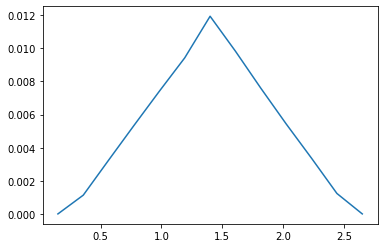

In [ ]:
import seaborn as sb 
import matplotlib as mpl
import matplotlib.pyplot as plt
x = np.linspace(0.15,2.8-0.15, 13)
plt.plot( np.linspace(0.15,2.8-0.15, 13) , vector_k)

plt.show()

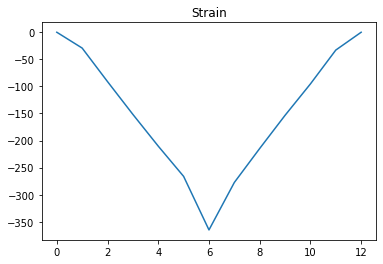

In [ ]:
plt.plot( datos.index, datos.e_2)
plt.title("Strain")
plt.show()

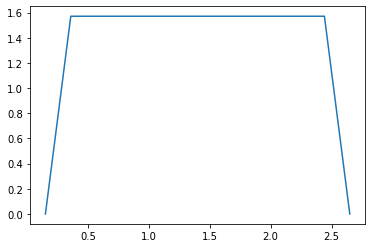

In [ ]:
plt.plot( x , vector_theta)
plt.show()

Cubic Spline 0.99 curvatura, 0.95 para angulo , documentación de python: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

Documentación Interpolación Polinómica: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PPoly.html#scipy.interpolate.PPoly





In [ ]:
vector_k

[0.0,
 0.0011334459930313588,
 0.003248813588850174,
 0.005344677700348432,
 0.007409130662020906,
 0.00942398606271777,
 0.011935282229965156,
 0.009823060975609756,
 0.007590372822299652,
 0.00543234668989547,
 0.003361588850174216,
 0.0012345348432055748,
 0.0]

In [ ]:
k_1[:]

array([-0.,  0.])

In [ ]:
from scipy.interpolate import CubicSpline
x = np.linspace(0,2.8, 13)
k_1 , k_2, k_3, k_4 = np.array([  -e_1/r*np.cos(theta_1),  - -e_1/r*np.sin(theta_1)  ]) , np.array([-e_2/r*np.cos(theta_2),  - -e_2/r*np.sin(theta_2)]), np.array([-e_3/r*np.cos(theta_3),  - -e_3/r*np.sin(theta_3)]), np.array( [-e_4/r*np.cos(theta_4),  - -e_4/r*np.sin(theta_4)])  
interpolacion_k = CubicSpline(x , vector_k, bc_type='natural')
ikapp = CubicSpline(x , vector_kapp , bc_type='natural')

from scipy.interpolate import interp1d
#interpolacion_k_lin = interp1d(x,y )
xprima = np.linspace(0,2.8, 10**3)

In [ ]:
# y = mx + b, y1-y2 = m(x1 -x2) : > m = (y1-y2)/(x1-x2) , b = y -mx 
r = []
for i in range(0,11): 
  if i ==0 : 
    m = (vector_k[1] - vector_k[0])/(x[1] - x[0])
    b = vector_k[1]  -  m*x[1] #da igual 0 que 1 es la misma recta 
    ######
    r_0 = np.array([0,0,0])
    T_0 = vector_kapp[0]
    N_0 = np.array( [ - T_0[1] , T_0[0]  ]) # Tiene que ir en la dirección interna a la curvatura (revisar el signo)
    T_0 = np.append(T_0 , 0)/np.linalg.norm(T_0)
    N_0 = np.append(N_0, 0)/np.linalg.norm(N_0)
    B_0 = np.cross(T_0, N_0) # producto vectorial 
    B_0 = B_0/np.linalg.norm(B_0)
    ####
    T = (m*x[1]*x[1]/2 + b*x[1] -m*x[0]*x[0]/2 - b*x[0] )*N_0
    N = (-m*x[1]*x[1]/2 - b*x[1] + m*x[0]*x[0]/2 + b*x[0] )*T_0

    #(m*x[1]*x[1]/2 + b*x + C )*(m*x[1]*x[1]/2 + b*x + C )(N_0[0]*T_0[0] + N_0[1]*T_0[1]  + N_0[2]*T_0[2]) =  0 tomamos las ctes = 0 
    ri = (m*x[1]*x[1]*x[1]/6 + b*x[1]*x[1]/2 - m*x[0]*x[0]*x[0]/6 - b*x[0]*x[0]/2 )*N_0 + r_0
    r.append(ri)
  else:
    m = (vector_k[i] - vector_k[i-1])/(x[i] - x[i-1])
    b = vector_k[i]  -  m*x[i] #da igual 0 que 1 es la misma recta 
    ######
    r_1 = ri 
    T1 = (m*x[i]*x[i]/2 + b*x[i] -m*x[i-1]*x[i-1]/2 - b*x[i-1] )*N
    N1 = (-m*x[i]*x[i]/2 - b*x[i] + m*x[i-1]*x[i-1]/2 + b*x[i-1] )*T
    
    ####
    T1 = T1/np.linalg.norm(T1)
    N1 = N1/np.linalg.norm(N1)
    B1 = np.cross(T1, N1) # producto vectorial 
    
    #print(np.linalg.norm(T1),np.linalg.norm(N1), np.linalg.norm(B1), )
    #(m*x[1]*x[1]/2 + b*x + C )*(m*x[1]*x[1]/2 + b*x + C )(N_0[0]*T_0[0] + N_0[1]*T_0[1]  + N_0[2]*T_0[2]) =  0 tomamos las ctes = 0 
    ri = (m*x[i]*x[i]*x[i]/6 + b*x[i]*x[i]/2 - m*x[i-1]*x[i-1]*x[i-1]/6 - b*x[i-1]*x[i-1]/2 )*N1 + r_1
    r.append(ri)
    T = T1
    N = N1

r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


[array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan])]

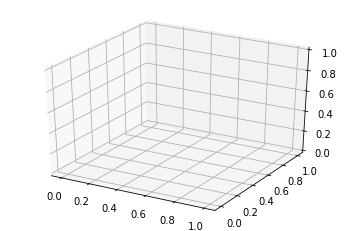

In [ ]:
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
for i in range(0,11):
  ax.scatter(r[i][0], r[i][1], r[i][2])
  #Axes3D.plot(T2[0], T2[1], T2[2])
  # for ii in xrange(0,360,1):
  #         ax.view_init(elev=10., azim=ii)
  #         savefig("movie%d.png" % ii)

plt.show()

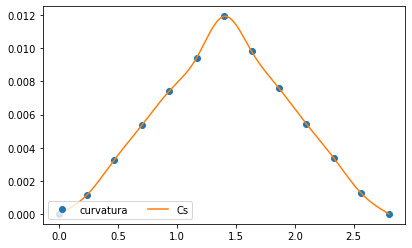

In [ ]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, vector_k, 'o', label='curvatura')
ax.plot(xprima, interpolacion_k(xprima), label="Cs")
# ax.plot(xs, cs(xs, 1), label="S'")
# ax.plot(xs, cs(xs, 2), label="S''")
# ax.plot(xs, cs(xs, 3), label="S'''")
# ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
ax.set_title("Curvatura ")

plt.show()

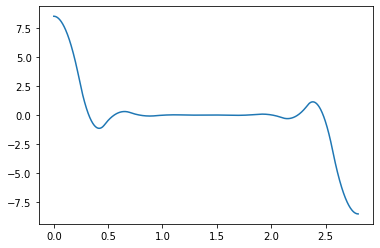

In [ ]:
interpolacion_theta = CubicSpline(x, vector_theta, bc_type='natural')

#interpolacion_theta.derivative(2)
plt.plot(xprima, interpolacion_theta.__call__(xprima, 1) ) 
plt.show()


# Calculo Vectores Tangente, Binormal y Normal a partir de curvatura y torsión: 

$$ \left[
 \begin{matrix}
\frac{dT}{ds} \\
\frac{dN}{ds}\\
\frac{dB}{ds}
\end{matrix} \right] 
  = \left[ \begin{matrix}
0 & \kappa & 0 \\
-\kappa & 0 & \tau \\
0 & -\tau & 0 
\end{matrix}\right] \left[ \begin{matrix}
T \\
N \\
B 
\end{matrix}  \right] $$


$T\cdot N = 0  \hspace{1em}$, $T \cdot B = 0 \hspace{1em}$,   $B \cdot N = 0 \hspace{1em}$

$$T = \frac{dr}{ds} = lim_{ ds → 0} \frac{\Delta r}{\Delta s
} $$

In [ ]:
r_0 = np.array([0,0,0])
T_0 = vector_kapp[0]
N_0 = np.array( [ - T_0[1] ,  T_0[0]  ]) # Tiene que ir en la dirección interna a la curvatura (revisar el signo)

T_0 = np.append(T_0 , 0)/np.linalg.norm(T_0)
N_0 = np.append(N_0, 0)/np.linalg.norm(N_0)
B_0 = np.cross(T_0, N_0) # producto vectorial 
B_0 = B_0/np.linalg.norm(B_0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
print(np.linalg.norm(T_0) , np.linalg.norm(N_0) , np.linalg.norm(B_0) )
print(T_0@N_0,T_0@B_0, B_0@N_0 )

nan nan nan
nan nan nan


In [ ]:
vecs = np.array([ T_0, N_0,B_0 ])
Matriz = np.array([[0, vector_k[0], 0 ],[-vector_k[0], 0 , interpolacion_theta.__call__(x, 2)[0] ],[0,interpolacion_theta.__call__(x, 2)[0] , 0 ]])
deriv_vecs = Matriz@vecs #multiplicamos las matrices 


# Calculo de la posición 
$$r(s) = \int T(s)ds + r_0
$$

scipy integrate documentation : https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

General integration: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

Sería bueno igualar la longitud total de arco a la longitud de la sonda más la elongación medida en los sensores para posiciones más precisas. 


## Ecuaciones Frenet-Serret Integradas 
$$N(i) = \frac{s\cdot \tau(i)B(i-1) -s\cdot \kappa(i)T(i-1)+ N(i-1)}{1 + s^2 \tau^2(i) + s^2 \kappa^2(i)}$$\\

$$T(i) = s\kappa(i)N(i) + T(i-1)$$\\

$$ B(i) = -s \tau(i)N(i) + B(i-1) $$\\

$$r(i) = sT(i) + r(i-1)$$\\



In [ ]:
from scipy.integrate import odeint 
#tau = (theta_i  - theta_0)/s
def FSx(s,k,tau,Na,Ta,Ba):
  dyds = [- k*Na ,-k*Ta + tau*Ba , -tau*Na]
  return dyds


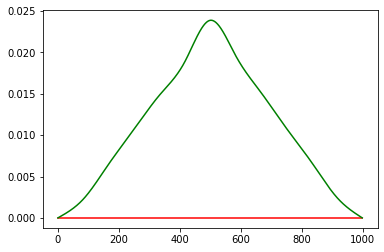

In [ ]:
x = []
y = []
for i in range(0,len(ikapp(xprima)) ) :
  x.append(ikapp(xprima)[i][0])
  y.append(ikapp(xprima)[i][1])

plt.plot(np.arange(0,1000,1),x, c= "r")
plt.plot(np.arange(0,1000,1),y, c= "g")
plt.show()

Punto medio [3.89647665e-21 3.35033896e-03 1.40139378e+00] [-2.80823069e-21  9.99970698e-01 -7.65530772e-03]


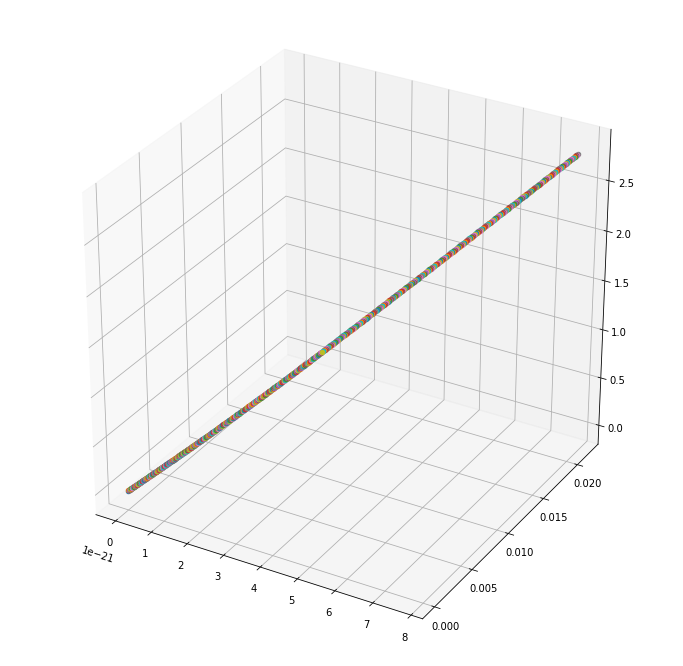

In [ ]:
T = []
B = []
N = []
r = []
for i in range(1,len(xprima)-1): 
  s = 2.8/999 #  xprima[1]- xprima[0]  #xprima[i:i+1], hay que quitar los dos primeros puntos seguro los 0.0 dan malos valores, no sé si hace falta pi, en principio NO  
  k = interpolacion_k(xprima)[i]
  tau = 0 #interpolacion_theta.__call__(xprima, 2)[i]
  if i == 1 :  
    r_0 = np.array([0,0,0])
    T_0 =   np.append(ikapp(xprima)[i], 1)#[0.99988109, 0.01542082] #este vector debería ser el inicial ?  #ikapp(xprima)[1] #vector_kapp[0]
    # if T_0.all()==0:
    #   T_0 = [ 1,0 ]
    T_0 = T_0/np.linalg.norm(T_0)
    N_0 = np.array( [ - T_0[0] ,  T_0[2] , - T_0[1]  ])  # se curva en plano YZ# Tiene que ir en la dirección interna a la curvatura (revisar el signo)
    N_0 = N_0/np.linalg.norm(N_0)
    B_0 = np.cross(T_0, N_0) # producto vectorial 
    B_0 = B_0/np.linalg.norm(B_0)
   
    r0,T0,B0,N0 = r_0, T_0, B_0, N_0
  else: 
    r0,T0,B0,N0 = ri, Ti, Bi, Ni
  
  Ni = (s*tau*B0 -s*k*T0 + N0  )/(1 + s*s*tau*tau + s*s*k*k)
  Ti = s*k*Ni + T0
  Bi = -s*tau*Ni + B0
  ri = s*Ti + r0

  Ni = Ni/np.linalg.norm(Ni)
  Ti = Ti/np.linalg.norm(Ti)
  Bi = Bi/np.linalg.norm(Bi)

  r.append(ri)
  N.append(Ni)
  B.append(Bi)
  T.append(Ti)
  if i ==500: 
    print("Punto medio", ri, Ni)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(r)):
  ax.scatter(r[i][0], r[i][1], r[i][2])
plt.grid(visible = True)
plt.show()

In [ ]:
np.where(k)# Where K = max

(array([0]),)

NameError: ignored

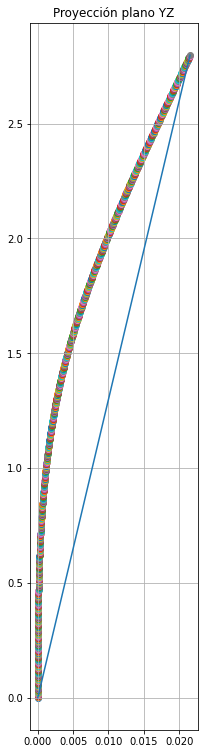

In [ ]:
fig = plt.figure(figsize= (3,13))
ax = fig.add_subplot()
for i in range(0,len(r)):
  ax.scatter(r[i][1], r[i][2])
  #print(i)
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
plt.grid(visible = True)
ax.set_title("Proyección plano YZ")
plt.plot([r[0][1],r[-1][1]],[r[0][2],r[-1][2]])
plt.plot( [3.29196397e-03, equis[500]]  , [1.40139392e+00,yrecta]    , c = "r"     )
plt.show()

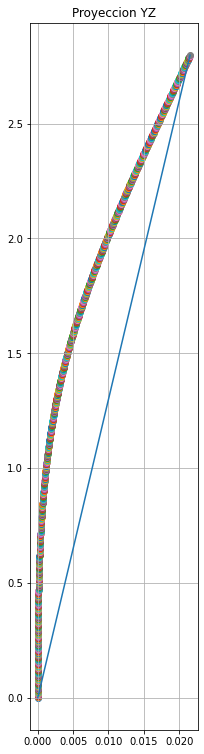

0.007699524067606931


In [ ]:
fig = plt.figure(figsize= (3,13))
ax = fig.add_subplot()
for i in range(0,len(r)):
  ax.scatter(r[i][1], r[i][2])
  #print(i)
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
plt.grid(visible = True)
plt.plot([r[0][1],r[-1][1]],[r[0][2],r[-1][2]])
ax.set_title("Proyeccion YZ")
plt.show()
beta = np.arcsin(r[-1][1]/np.sqrt(r[-1][1]**2 + r[-1][2]**2) )
print(beta)

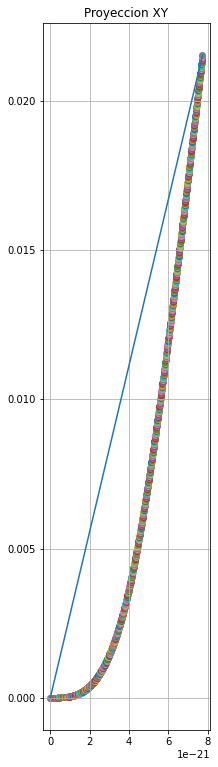

3.591882963536225e-19


In [ ]:
fig = plt.figure(figsize= (3,13))
ax = fig.add_subplot()
for i in range(0,len(r)):
  ax.scatter(r[i][0], r[i][1])
  #print(i)
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
plt.grid(visible = True)
plt.plot([r[0][0],r[-1][0]],[r[0][1],r[-1][1]])
ax.set_title("Proyeccion XY")
plt.show()
alpha = np.arcsin(r[-1][0]/np.sqrt(r[-1][0]**2 + r[-1][1]**2) )#*math.pi/180
print(alpha)

In [ ]:
alphax = np.arcsin(r[-1][1]/np.sqrt(r[-1][1]**2 + r[-1][2]**2) )#*math.pi/180
alphay = np.arcsin(r[-1][2]/np.sqrt(r[-1][0]**2 + r[-1][2]**2) )#*math.pi/180
alphaz = np.arcsin(r[-1][0]/np.sqrt(r[-1][0]**2 + r[-1][1]**2))#*math.pi/180
alphax,alphay,alphaz

(0.007699524067606931, 1.5707963267948966, 3.591882963536225e-19)

In [ ]:
rotacionx = np.array( [[1,0,0],[0, np.cos(alphax), -np.sin(alphax)],[0,np.sin(alphax),np.cos(alphax)]] )
rotaciony = np.array([[np.cos(alphay),0,np.sin(alphay)],[0,1,0],[-np.sin(alphay),0,np.cos(alphay)]] )
doblerot = rotacionx@rotaciony
#Usan los ángulos de Euler (alpha, beta, gamma) = (phi,theta,psi)
def rotx(phi):
  return np.array( [[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),np.cos(phi)]] )
def roty(thet): 
  return np.array([[np.cos(thet),0,np.sin(thet)],[0,1,0],[-np.sin(thet),0,np.cos(thet)]] )
def rotz(gamma): 
  return np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]] )

#MatrizEuler : rotz*rotx*roty 

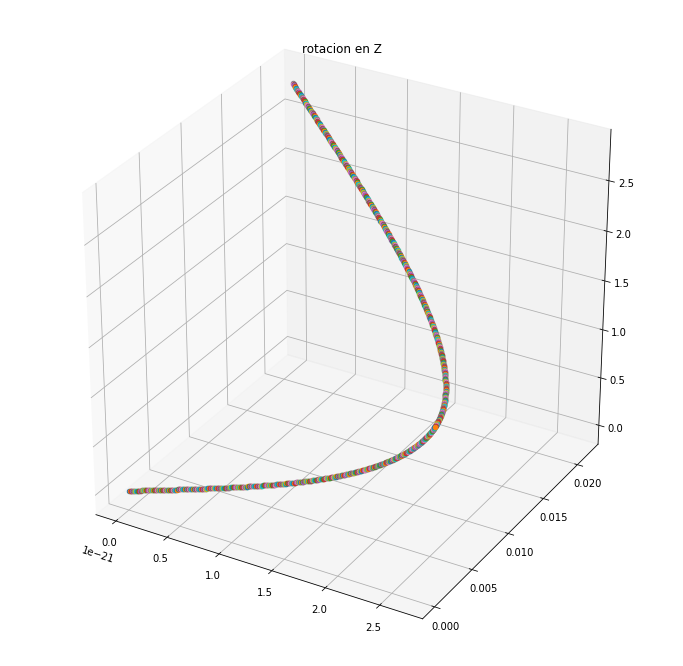

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
ks = []
for i in range(0,len(r)):
  k = rotz(alpha)@r[i]
  ks.append(k)
  ax.scatter(k[0], k[1], k[2])
plt.grid(visible = True)
ax.set_title("rotacion en Z")
plt.show()

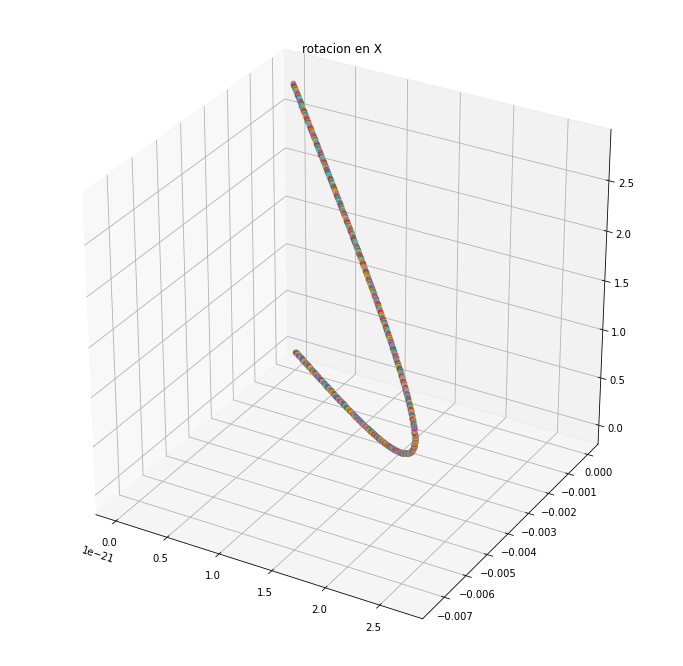

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
ts = []
for i in range(0,len(r)):
  t = rotx(beta)@ks[i]
  ts.append(t)
  ax.scatter(t[0], t[1], t[2])
plt.grid(visible = True)
ax.set_title("rotacion en X")
plt.show()

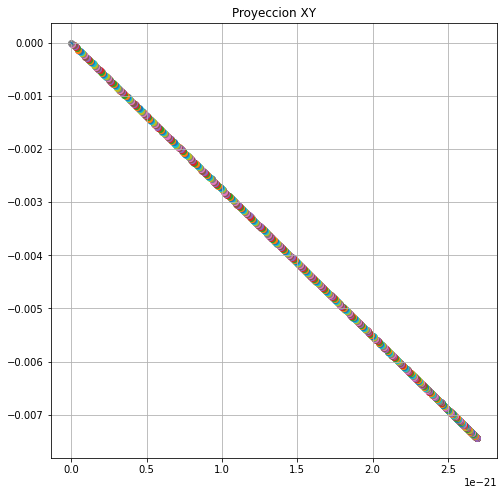

alpha = 3.591882963536225e-19 distancia =  0.007439748832464426 m
max_x,max_y= 2.69308493838701e-21 0.007439748832464426


In [ ]:
fig = plt.figure(figsize= (8,8))
ax = fig.add_subplot()
max_x, max_y = 0,0
for i in range(0,len(r)):
  ax.scatter(ts[i][0], ts[i][1])
  if (abs(ts[i][0])> max_x):
    max_x = abs(ts[i][0])
  if (abs(ts[i][1])> max_y):
    max_y = abs(ts[i][1])
  #print(i)
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
plt.grid(visible = True)
plt.plot([ts[0][0],ts[-1][0]],[ts[0][1],ts[-1][1]])
ax.set_title("Proyeccion XY")
plt.show()
distancia = np.sqrt(max_x**2 + max_y**2)
alpha2 = np.arcsin(max_x/np.sqrt(max_x**2 + max_y**2) )#*math.pi/180
print("alpha =", alpha,"distancia = ", distancia , "m")
print("max_x,max_y=",max_x,max_y)

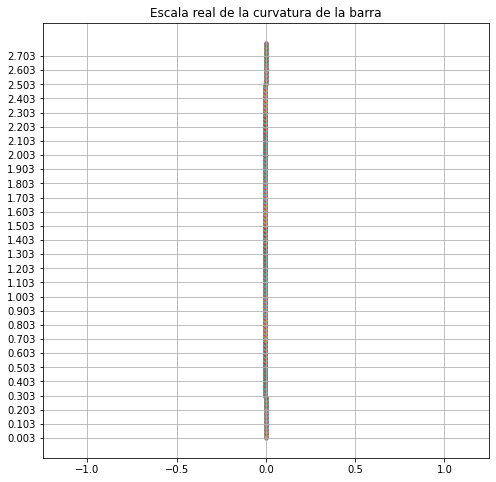

In [ ]:
fig = plt.figure(figsize= (8,8))
ax = fig.add_subplot()
max_x, max_y = 0,0
for i in range(0,len(r)):
  ax.scatter(ts[i][1], ts[i][2], marker = ".")
ax.set_title("Escala real de la curvatura de la barra")
plt.xlim([-1.25,1.25])
plt.yticks(np.arange(ts[0][2],ts[-1][2],0.1))
plt.grid(visible = True)
plt.show()

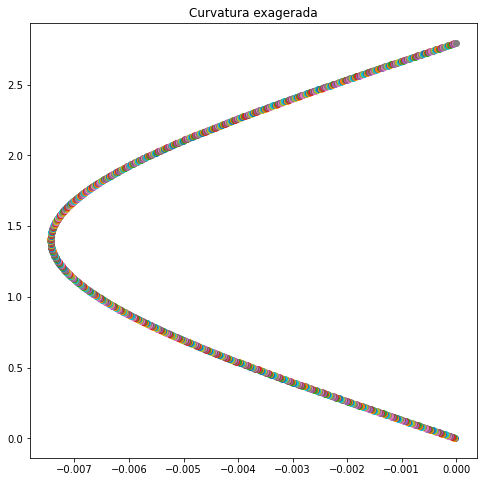

In [ ]:
fig = plt.figure(figsize= (8,8))
ax = fig.add_subplot()
max_x, max_y = 0,0
for i in range(0,len(r)):
  ax.scatter(ts[i][1], ts[i][2])
ax.set_title("Curvatura exagerada")
#plt.xlim([-1.25,1.25])
plt.show()

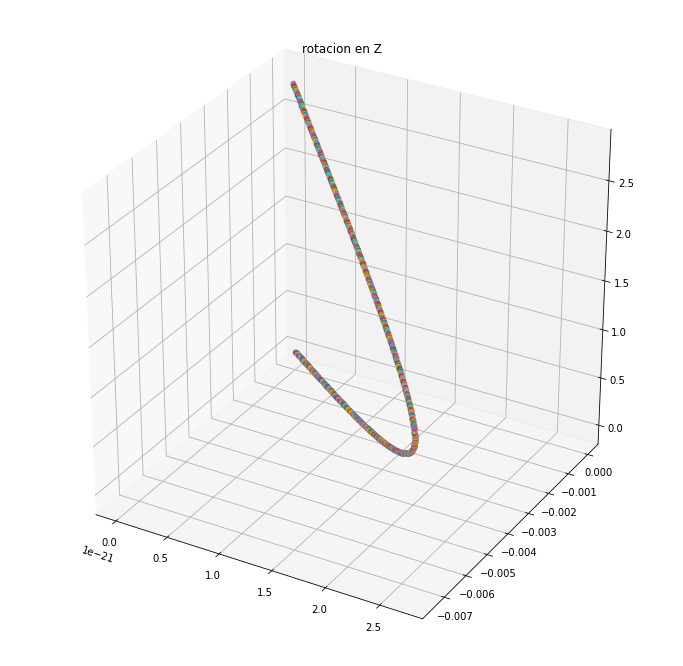

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
ks2 = []
for i in range(0,len(r)):
  k = rotx(-alpha2)@ts[i]
  ks2.append(k)
  ax.scatter(k[0], k[1], k[2])
plt.grid(visible = True)
ax.set_title("rotacion en Z")
plt.show()

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
any =  np.arcsin(ks[-1][0]/np.sqrt(ks[-1][0]**2 + ks[-1][2]**2) )
print(any,roty(any))
for i in range(0,len(r)):
  t = roty(any)@ks[i].T
  ax.scatter(t[0],t[1], t[2])
plt.grid(visible = True)
ax.set_title("rotacion en x y luego en y ")
plt.show()

In [ ]:
#m = (y1-y2)/(x1-x2) , y = mx + b ===> b = y - mx 
m = (r[-1][2]-r[0][2])/(r[-1][1]-r[0][1])
B = r[-1][2] - m*r[-1][1]
#Punto Medio de la barra torcida : 3.29196397e-03 1.40139392e+00 (y,z); vector Normal: 9.99971016e-01 -7.61365399e-03
#Recta Perp CUrva : 
#mp = (1.40139392e+00 - )
# Recta Perp a la curva: vector director de la recta (1,m) , vector perp (m, b)
mpc = -9.99971016e-01/7.61365399e-03
Bpc = 1.40139392e+00  - mpc*3.29196397e-03
x_recta = -(B-Bpc)/(m-mpc)
y_recta = mpc*x_recta + Bpc
x_recta, y_recta

In [ ]:
deepd = np.sqrt( (3.29196397e-03 -equis[500])**2 +   (1.40139392e+00-yrecta)**2)   
deepd

In [ ]:
r[0][1],r[-1][1] 
equis = np.linspace(r[0][1],r[-1][1], 1000 )
yrecta = equis[500]*m + B 
yrecta, equis[500]

In [ ]:
alphay = np.arcsin(r[-1][0]/2.8 )*math.pi/180
alphay

In [ ]:
# fig = plt.figure(figsize= (10,10))
# ax = fig.add_subplot()
# for i in range(0,len(r)):
#   ax.scatter(r[i][0], r[i][1])
#   print(i)
# #Axes3D.plot(T2[0], T2[1], T2[2])
# # for ii in xrange(0,360,1):
# #         ax.view_init(elev=10., azim=ii)
# #         savefig("movie%d.png" % ii)
# ax.set_xlim([0, 2.5])
# plt.show()

In [ ]:
install ipympl
%matplotlib widget

Python + Frenet Serret Info: 

https://discourse.slicer.org/t/how-to-implement-cpr-curved-planar-reconstruction-from-centerline/9456/6

https://discourse.vtk.org/t/python-version-of-the-frenet-frame/2747


COsas varias : https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/16-scipy.html

Método matrices: 
Interpolación de Strain con picewise cubic Hermite method. 


$$A_{i+1} ^i = \left(\begin{matrix} \cos(Θ_i)\cos(\phi_i) & - \sin(Θ_i) & \cos(Θ_i)\sin(\phi_i) & R_i(1-\cos(\phi_i))\cos(Θ_i) \\ 
\sin(Θ_i)\cos(\phi_i) &  \cos(Θ_i) & \sin(Θ_i)\sin(\phi_i) & R_i(1-\cos(\phi_i))\sin(Θ_i)\\
-\sin(\phi_i) & 0 & \cos(\phi_i) & R_i\sin(\phi_i)\\
 0 & 0 & 0 & 1 
\end{matrix} \right) $$

Cálculo de phi_i => 
$$ \phi_i  (rad)= \frac{L_\phi}{r} = L_{\phi_i} \cdot \kappa_i $$

Composición de 2 rotaciones en ejez $z$ e $y^\prime$

In [ ]:
vector_kapp = []
vector_k = [] # falta por multiplicar por 10 a la -6 
vector_theta = []

for i in range(0, len(datos.e_1)): 

#Inputs : 
  e_1 , e_2, e_3, e_4  = datos.iloc(0)[i][0] , datos.iloc(0)[i][1] , datos.iloc(0)[i][2], datos.iloc(0)[i][3]
  r  =  0.0287  ## metros * 10 ^6 = micrometros 
  theta_1 , theta_2, theta_3, theta_4 =  0 , math.pi/2 , math.pi, 3*math.pi/2 
  k_1 , k_2, k_3, k_4 = np.array([  -e_1/r*np.cos(theta_1),  - e_1/r*np.sin(theta_1)  ]) , np.array([-e_2/r*np.cos(theta_2),  - e_2/r*np.sin(theta_2)]), np.array([-e_3/r*np.cos(theta_3),  - e_3/r*np.sin(theta_3)]), np.array( [-e_4/r*np.cos(theta_4),  - e_4/r*np.sin(theta_4)])  
  k_app = np.array( k_1 + k_2 + k_3 + k_4 )*10**(-6) 
  k = 2*np.linalg.norm(k_app)/4   
  if k_app.all() == 0: 
    theta = 0 
  else: 
    theta = np.arccos( (np.dot(k_app, np.array([1,0]) )/(np.linalg.norm(k_app))))
  vector_kapp.append(k_app)
  vector_k.append(k)
  vector_theta.append(theta)

from scipy.interpolate import CubicSpline
x = np.linspace(0,2.8, 13)
k_1 , k_2, k_3, k_4 = np.array([  -e_1/r*np.cos(theta_1),  - e_1/r*np.sin(theta_1)  ]) , np.array([-e_2/r*np.cos(theta_2),  - e_2/r*np.sin(theta_2)]), np.array([-e_3/r*np.cos(theta_3),  - e_3/r*np.sin(theta_3)]), np.array( [-e_4/r*np.cos(theta_4),  - e_4/r*np.sin(theta_4)])  
interpolacion_k = CubicSpline(x , vector_k, bc_type='natural')
ikapp = CubicSpline(x , vector_kapp , bc_type='natural')
xprima = np.linspace(0,2.8, 10**3)

In [ ]:
len(xprima)

In [ ]:
r = 0.0287
p0s, p1s , p2s, p3s, p4s = [],[],[] , [], []
p0n = np.array([0,0,0,1])
p1n = np.array([r,0,0,1])
p2n = np.array([0,r,0,1])
p3n = np.array([-1*r,0,0,1])
p4n = np.array([0,-1*r,0,1])
for i in range(1,len(xprima)): 
  s = 2.8/999
  radio = 1/(interpolacion_k(xprima)[i]*10**(-6))
  theta = np.pi*3/2 #1.5707963267948966
  phi = s * (interpolacion_k(xprima)[i]*10**(-6))
  A = np.array([[np.cos(theta)*np.cos(phi), -np.sin(theta), np.cos(theta)*np.sin(phi), radio*(1-np.cos(phi))*np.cos(theta) ],
                [np.sin(theta)*np.cos(phi), np.cos(theta), np.sin(theta)*np.sin(phi), radio*(1-np.cos(phi))*np.sin(theta)],
                [-np.sin(phi), 0, np.cos(phi), radio*np.sin(phi) ],
                [0,0,0,1] ])
  if i ==(1):
    A0 = A
  else: 
    A0 = A0@A
  Op0j = A0@p0n.T
  Op1j = A0@p1n.T
  Op2j = A0@p2n.T
  Op3j = A0@p3n.T
  Op4j = A0@p4n.T
  p0s.append(Op0j)
  p1s.append(Op1j)
  p2s.append(Op2j)
  p3s.append(Op3j)
  p4s.append(Op4j)  

In [ ]:
for i in range(0, len(p1s)):
  

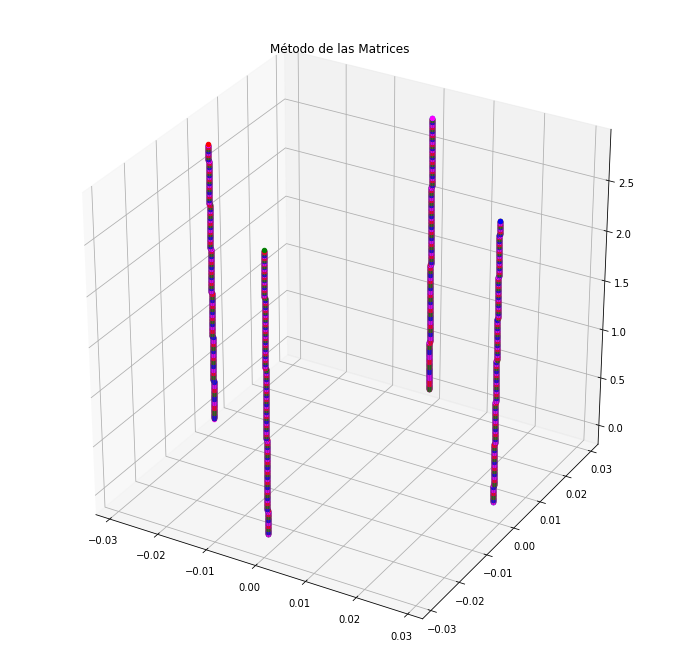

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(xprima)-2):
  ax.scatter(p1s[i][0], p1s[i][1],p1s[i][2] , c = "red")
  ax.scatter(p2s[i][0], p2s[i][1],p2s[i][2] , c = "g")
  ax.scatter(p3s[i][0], p3s[i][1],p3s[i][2] , c = "b")
  ax.scatter(p4s[i][0], p4s[i][1],p4s[i][2] , c = "magenta")

plt.grid(visible = True)
ax.set_title("Método de las Matrices ")
# plt.xlim([-1,1])
# plt.ylim([-1,1])
plt.show()

In [ ]:
p2s[300],p4s[300]

(array([-2.87000000e-02, -2.55754653e-14,  8.43643644e-01,  1.00000000e+00]),
 array([ 2.87000000e-02, -2.66334005e-14,  8.43643644e-01,  1.00000000e+00]))

In [ ]:
(p1s[4] + p3s[4])/2

array([-1.63462044e-16, -1.63064007e-16,  1.40140140e-02,  1.00000000e+00])

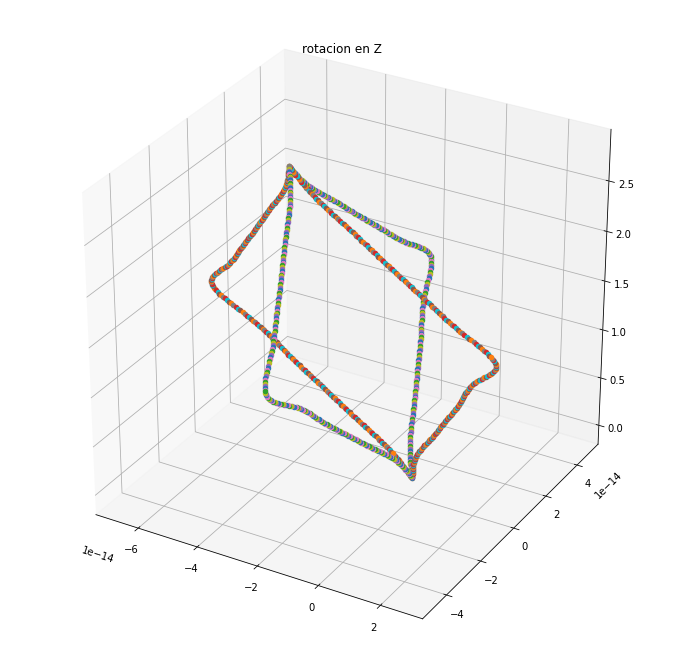

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(p0s)):
  ax.scatter(p0s[i][0], p0s[i][1], p0s[i][2])
plt.grid(visible = True)
ax.set_title("rotacion en Z")
plt.show()

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( )
for i in range(0,len(rmatr)):
  ax.scatter(rmatr[i][0], rmatr[i][1])
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
ax.set_title("Proyección XY")
plt.show()

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot()
for i in range(0,len(rmatr)):
  ax.scatter(rmatr[i][0], rmatr[i][2])
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
ax.set_title("Proyección XZ")
plt.show()

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot()
for i in range(0,len(rmatr)):
  ax.scatter(rmatr[i][1], rmatr[i][2])
#Axes3D.plot(T2[0], T2[1], T2[2])
# for ii in xrange(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
ax.set_title("Proyección YZ")
plt.show()


In [ ]:
a = [45,6,77,8,8,8]
for i in range(0,len(a)): 
  print(a[i])

45
6
77
8
8
8


### Reconstrucción a partir de geometría fija: 

## Metodo Israel - youtube 

http://blog.espol.edu.ec/analisisnumerico/el-polinomio-de-interpolacion/



Matriz Vandermonde:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [5.05051993e+01 2.88404719e+01 1.64690533e+01 9.40448262e+00
  5.37033257e+00 3.06667289e+00 1.75119185e+00 1.00000000e+00]
 [6.01870975e+03 1.73609843e+03 5.00778052e+02 1.44449562e+02
  4.16665144e+01 1.20187171e+01 3.46680215e+00 1.00000000e+00]
 [9.18370581e+04 1.79479726e+04 3.50762237e+03 6.85504428e+02
  1.33970044e+02 2.61821395e+01 5.11684859e+00 1.00000000e+00]
 [7.95820424e+05 1.14246130e+05 1.64009088e+04 2.35447635e+03
  3.38003151e+02 4.85229466e+01 6.96584141e+00 1.00000000e+00]
 [3.33507892e+06 3.90151978e+05 4.56416683e+04 5.33936006e+03
  6.24621467e+02 7.30709249e+01 8.54815330e+00 1.00000000e+00]
 [1.33656532e+07 1.28230575e+06 1.23024891e+05 1.18030540e+04
  1.13238940e+03 1.08641861e+02 1.04231406e+01 1.00000000e+00]
 [3.93485675e+07 3.23548268e+06 2.66041405e+05 2.18755704e+04
  1.79874475e+03 1.47903923e+02 1.21615757

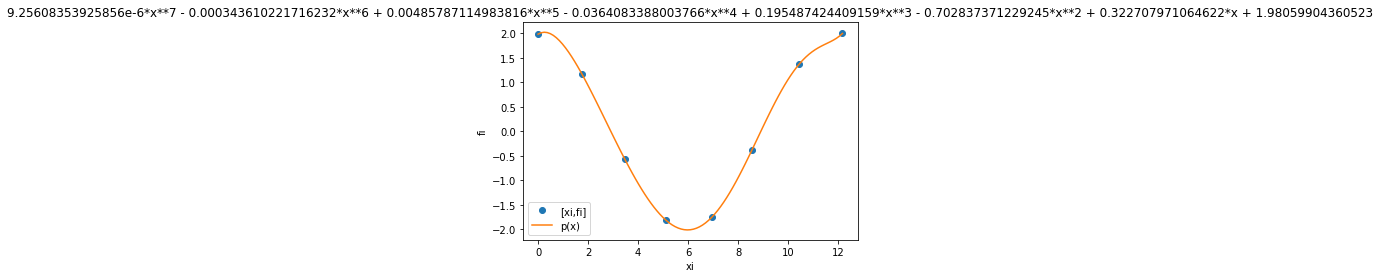

In [ ]:
# El polinomio de interpolación
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO
xi = ds
fi = xs
# muestras = tramos+1
muestras = 101

# PROCEDIMIENTO
# Convierte a arreglos numpy 
xi = np.array(xi)
B = np.array(fi)
n = len(xi)

# Matriz Vandermonde D
D = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
    for j in range(0,n,1):
        potencia = (n-1)-j # Derecha a izquierda
        D[i,j] = xi[i]**potencia

# Aplicar métodos Unidad03. Tarea
# Resuelve sistema de ecuaciones A.X=B
coeficiente = np.linalg.solve(D,B)

# Polinomio en forma simbólica
x = sym.Symbol('x')
polinomio = 0
for i in range(0,n,1):
    potencia = (n-1)-i   # Derecha a izquierda
    termino = coeficiente[i]*(x**potencia)
    polinomio = polinomio + termino

# Polinomio a forma Lambda
# para evaluación con vectores de datos xin
px = sym.lambdify(x,polinomio)

# Para graficar el polinomio en [a,b]
a = np.min(xi)
b = np.max(xi)
xin = np.linspace(a,b,muestras)
yin = px(xin)

# Usando evaluación simbólica
##yin = np.zeros(muestras,dtype=float)
##for j in range(0,muestras,1):
##    yin[j] = polinomio.subs(x,xin[j])
    
# SALIDA
print('Matriz Vandermonde: ', D)
print('los coeficientes del polinomio: ', coeficiente)
print('Polinomio de interpolación: ', polinomio)
print('\n formato pprint')
sym.pprint(polinomio)
# Grafica
plt.plot(xi,fi,'o', label='[xi,fi]')
plt.plot(xin,yin, label='p(x)')
plt.xlabel('xi')
plt.ylabel('fi')
plt.legend()
plt.title(polinomio)
plt.show()

## Método Fernandino Posiciones fijas 

In [ ]:
#Input: 
import numpy as np 
r , k = 2 , 2 
#input generator sqrt(x^2 + y^2) = k 
x = np.linspace(0,k,8) + np.random.random(8)/10
y = np.sqrt(k**2 - x**2)
z = np.random.random(8)/10

theta = np.linspace(0,2*np.pi,8) + np.random.random(8)/10
phi = np.random.random(8)/10



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


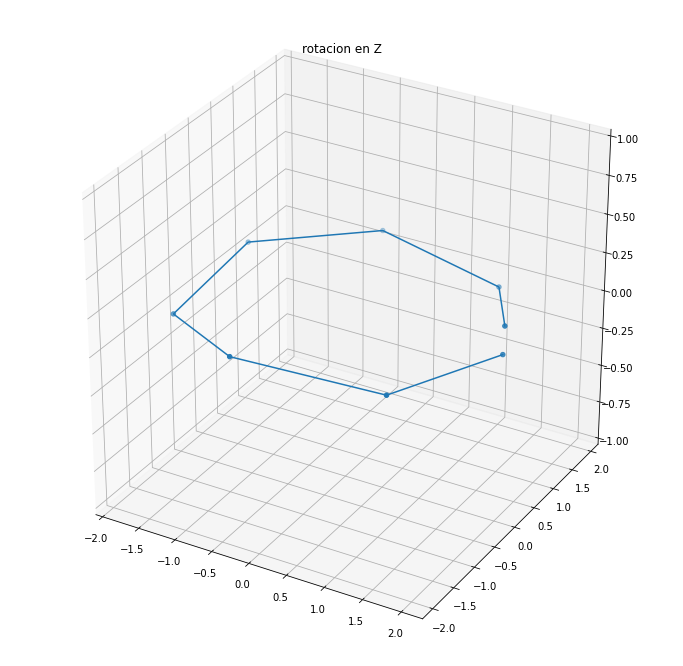

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
ax.scatter( r*np.cos(phi)*np.cos(theta) ,r*np.cos(phi)*np.sin(theta),r*np.sin(phi))
ax.plot(r*np.cos(phi)*np.cos(theta) ,r*np.cos(phi)*np.sin(theta),r*np.sin(phi))
plt.grid(visible = True)
ax.set_title("rotacion en Z")
ax.set_zlim([-1,1])
plt.show()

## Interpolación para conseguir todos los puntos: 

In [ ]:
ds = [0]
for i in range(0,len(theta)-1):
  ds.append( r*np.sqrt(( np.cos(phi[i])*np.cos(theta[i]) - np.cos(phi[i+1])*np.cos(theta[i+1]) )**2  +(np.cos(phi[i])*np.sin(theta[i]) - np.cos(phi[i+1])*np.sin(theta[i+1]) )**2 +  (np.sin(phi[i])- np.sin(phi[i+1]))  ) )
for j in  range(1,len(ds)): 
  ds[j] = ds[j] + ds[j-1]

xs, ys, zs =  np.array(r*np.cos(phi)*np.cos(theta)) ,np.array(r*np.cos(phi)*np.sin(theta)), np.array(r*np.sin(phi) )
#xs, ys, zs = xs[:, np.newaxis], ys[:, np.newaxis] , zs[:, np.newaxis]
ds = np.array(ds)
ds = ds[:, np.newaxis]
# pos = pos[:, np.newaxis]

In [ ]:
from scipy.interpolate import KroghInterpolator as KI
ts = KI(ds,theta)
phis = KI(ds,phi)

pos = np.linspace(0,max(ds),10**3 )
thetas, phies = ts(pos), phis(pos)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline


for degree in [7]:
    modelx = make_pipeline(PolynomialFeatures(degree), Ridge())
    modely = make_pipeline(PolynomialFeatures(degree), Ridge())
    modelz = make_pipeline(PolynomialFeatures(degree), Ridge())
    modelx.fit(ds, xs) ,  modely.fit(ds, ys),  modelz.fit(ds, zs)
    x_plot, y_plot,z_plot  = modelx.predict(pos), modely.predict(pos), modelz.predict(pos)
    ax.plot(pos , x_plot, c = "blue", label=f"degree {degree}")
    ax.plot(pos , y_plot, c = "r", label=f"degree {degree}")
    ax.plot(pos , z_plot, c = "m", label=f"degree {degree}")

In [ ]:
a = []
for i in range(0, len(x_plot)):
  a.append(pos[i][0])

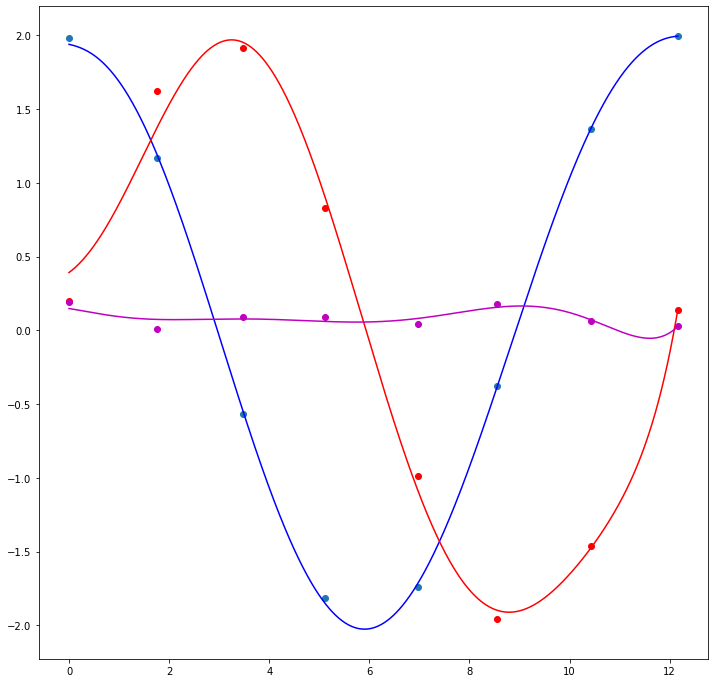

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot()
ax.scatter(ds, xs)
ax.scatter(ds, ys, c = "r")
ax.scatter(ds, zs, c = "m")
ax.plot(a,x_plot, c = "blue")
ax.plot(a,y_plot, c = "r")
ax.plot(a,z_plot, c = "m")

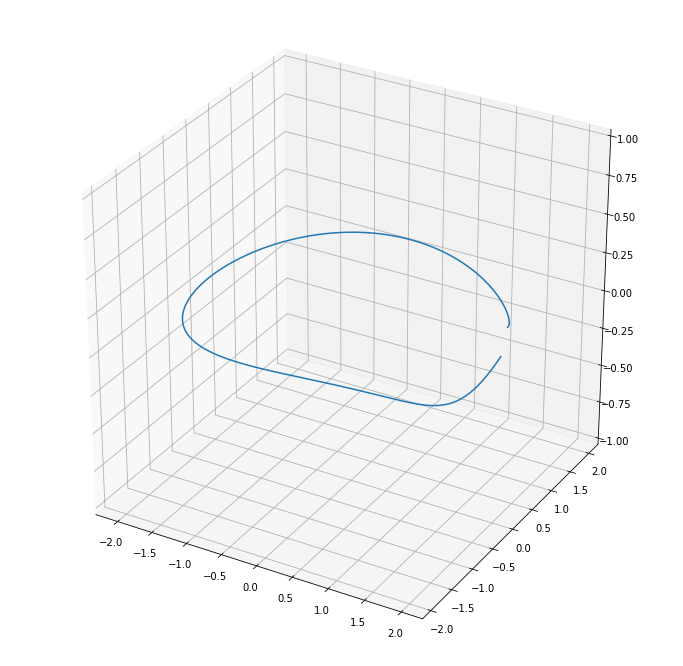

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
# ax.scatter( x_plot, y_plot,z_plot, c = "b", alpha = 0.3)
ax.plot(x_plot, y_plot,z_plot)
ax.set_zlim([-1,1])
plt.show()

In [ ]:
for degree in [3, 4, 5]:
  poly = PolynomialFeatures(degree)
  ix = poly.fit_transform(xs.reshape(1,-1))
  iy = poly.fit_transform(ys.reshape(1,-1))
  iz = poly.fit_transform(zs.reshape(1,-1))

## 2D


In [ ]:
def eps(s):
   return  0.16*(1-(1-2*s/np.pi)**2)
x = np.linspace(0,np.pi,100)
epsi = eps(x)
# a = np.array ([ np.cos(x) , np.sin(x)])
# a = np.reshape(a, (100,2))
r = 0.1
Kappexp , k0 = [] , []
for i in range(0,len(epsi)): 
  Kappexp.append( np.array([ -epsi[i]*2/r + 1 ])  ) # - epsi[i]*2/r*np.sin() ])    )

#Kappexp = -(epsi/r + epsi/r)

In [ ]:
len(tor), len(Kappexp)

(100, 100)

In [ ]:
tor  = np.zeros(len(x))
angul = tor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


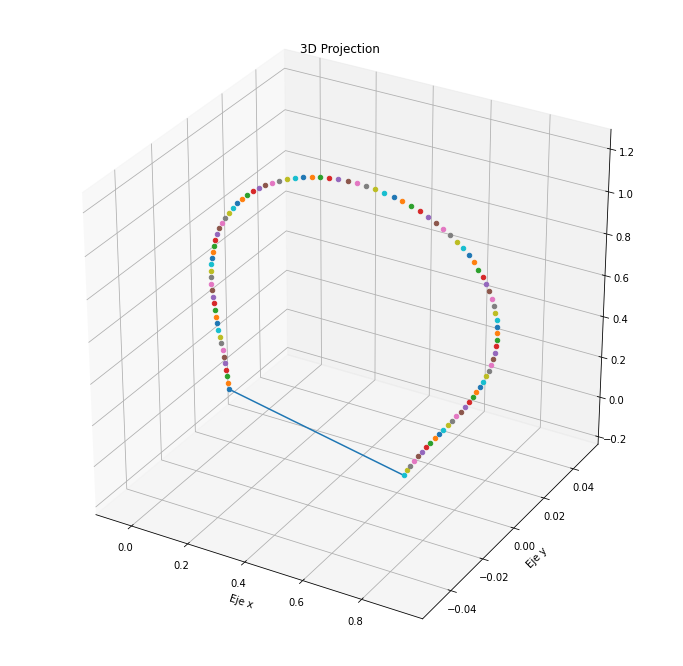

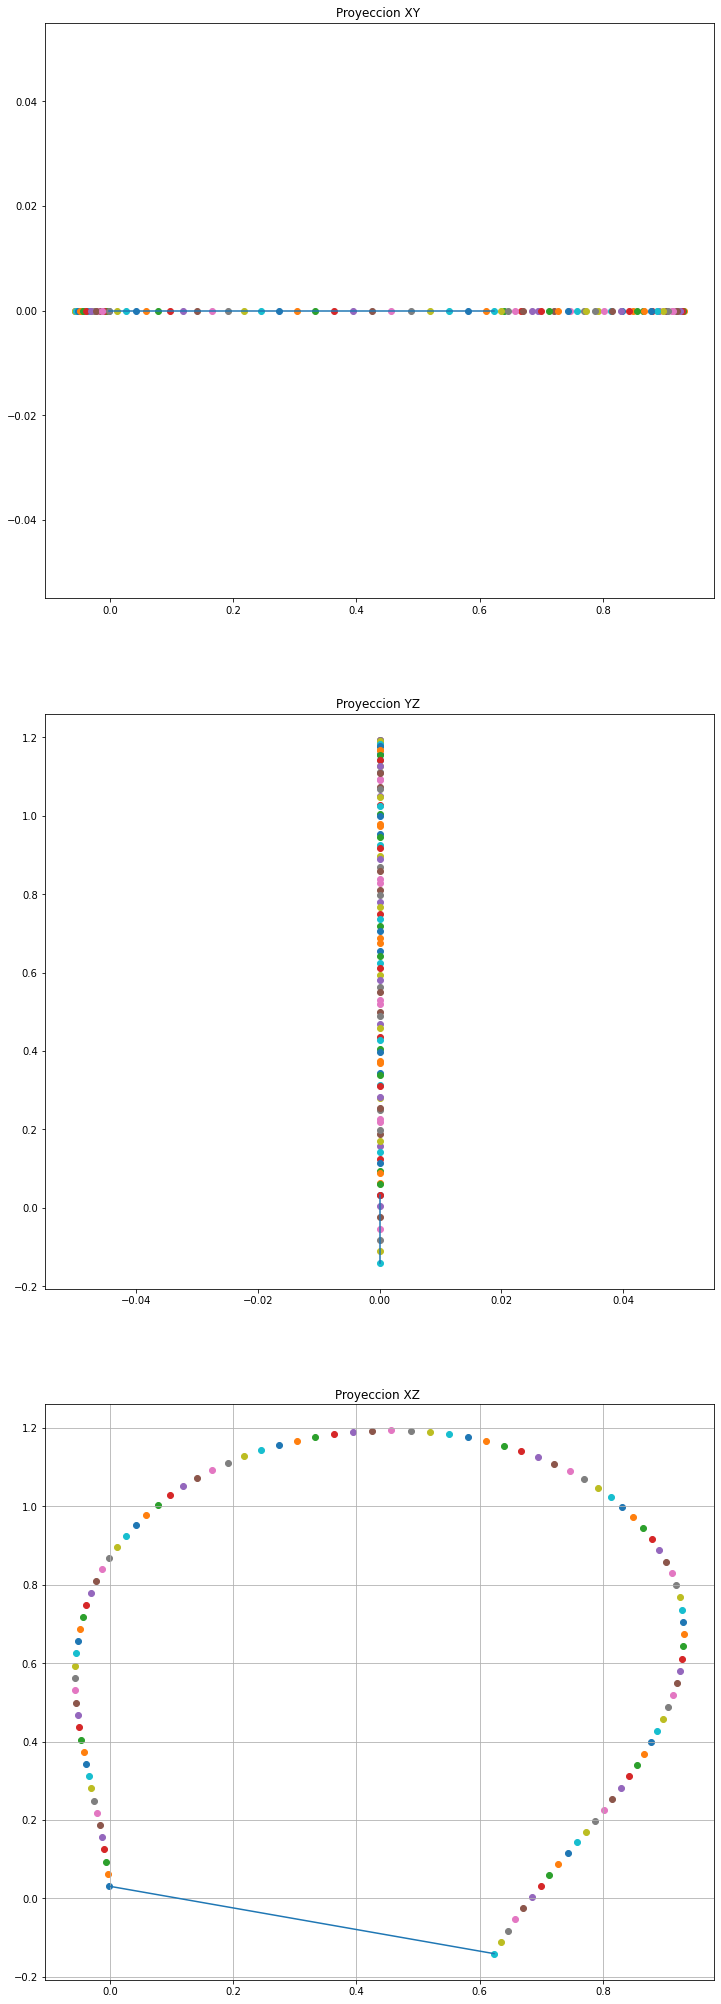

In [ ]:
pos = frenet(Kappexp,tor,[-1,0], np.pi)
alpha =  np.arcsin(pos[-1][0]/np.sqrt(pos[-1][0]**2 + pos[-1][2]**2) )

pos = roty(pos)

In [ ]:
import numpy as np 
import math 
def frenet(curvatura,torsion,normal,L):
  if len(curvatura)!=len(torsion):
    return "El vector curvatura y el vector de torsión deben tener el mismo número de elementos"
  T = []
  B = []
  N = []
  r = []
  s = L/(len(curvatura)) 
  for i in range(0,len(curvatura)): 
    k = curvatura[i]
    tau = torsion[i]
    if i == 0:  
      r_0 = np.array([0,0,0])
      N_0 = np.append(normal, 0)  
      N_0 = N_0/np.linalg.norm(N_0)
      T_0 = np.array( [ 0,0,1] )
      T_0 = T_0/np.linalg.norm(T_0)
      B_0 = np.cross(T_0, N_0) 
      B_0 = B_0/np.linalg.norm(B_0)
    
      r0,T0,B0,N0 = r_0, T_0, B_0, N_0
    else: 
      r0,T0,B0,N0 = ri, Ti, Bi, Ni
  
    Ni = (s*tau*B0 -s*k*T0 + N0  )/(1 + s*s*tau*tau + s*s*k*k)
    Ti = s*k*Ni + T0
    Bi = -s*tau*Ni + B0
    ri = s*Ti + r0

    Ni = Ni/np.linalg.norm(Ni)
    Ti = Ti/np.linalg.norm(Ti)
    Bi = Bi/np.linalg.norm(Bi)
    
    r.append(ri)
    N.append(Ni)
    B.append(Bi)
    T.append(Ti) 

  import matplotlib.pyplot as plt
  fig2 = plt.figure(figsize= (12,12))
  ax2 = fig2.add_subplot( projection='3d')
  fig, ax = plt.subplots(3 , 1 , figsize= (12,36))
  for i in range(0,len(r)):
    ax2.scatter(r[i][0], r[i][1], r[i][2])
    ax[0].scatter(r[i][0], r[i][1])
    ax[1].scatter(r[i][1], r[i][2])
    ax[2].scatter(r[i][0], r[i][2])
    
  ax2.plot([r[0][0], r[-1][0]], [r[0][1], r[-1][1]], [r[0][2] , r[-1][2] ])
  ax[0].plot([r[0][0], r[-1][0]], [r[0][1], r[-1][1]] )
  ax[1].plot( [r[0][1], r[-1][1]], [r[0][2] , r[-1][2] ])
  ax[2].plot([r[0][0], r[-1][0]], [r[0][2] , r[-1][2] ])
  ax2.set_title("3D Projection ")
  ax2.set_xlabel("Eje x")
  ax2.set_ylabel("Eje y")
  ax[0].set_title("Proyeccion XY ")
  ax[1].set_title("Proyeccion YZ ")
  ax[2].set_title("Proyeccion XZ ")
  plt.grid(visible = True)  
  return r 



In [ ]:
#Usan los ángulos de Euler (alpha, beta, gamma) = (phi,theta,psi)
def rotx(phi):
  return np.array( [[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),np.cos(phi)]] )
def roty(thet): 
  return np.array([[np.cos(thet),0,np.sin(thet)],[0,1,0],[-np.sin(thet),0,np.cos(thet)]] )
def rotz(gamma): 
  return np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]] )

#MatrizEuler : rotz*rotx*roty 

In [ ]:
def rotacion(posi):
  pos1, posf = [],[]
  if (posi[-1][0] < 0) and (posi[-1][1]< 0 ):
    alpha = - np.arcsin(posi[-1][0]/np.sqrt(posi[-1][0]**2 + posi[-1][1]**2) )
  else:
    alpha =  np.arcsin(posi[-1][0]/np.sqrt(posi[-1][0]**2 + posi[-1][1]**2) )
  
  for i in range(0,len(posi)):
    m = rotz(alpha)@posi[i]
    pos1.append(m)

  if (posi[-1][1] < 0) and (posi[-1][2]< 0 ):
    beta =  - np.arcsin(posi[-1][1]/np.sqrt(posi[-1][1]**2 + posi[-1][2]**2) )
  else:
    beta = np.arcsin(posi[-1][1]/np.sqrt(posi[-1][1]**2 + posi[-1][2]**2) )
  
  for i in range(0,len(pos1)):
    m2 = rotx(beta)@pos1[i]
    posf.append(m2)
  
  return posf 

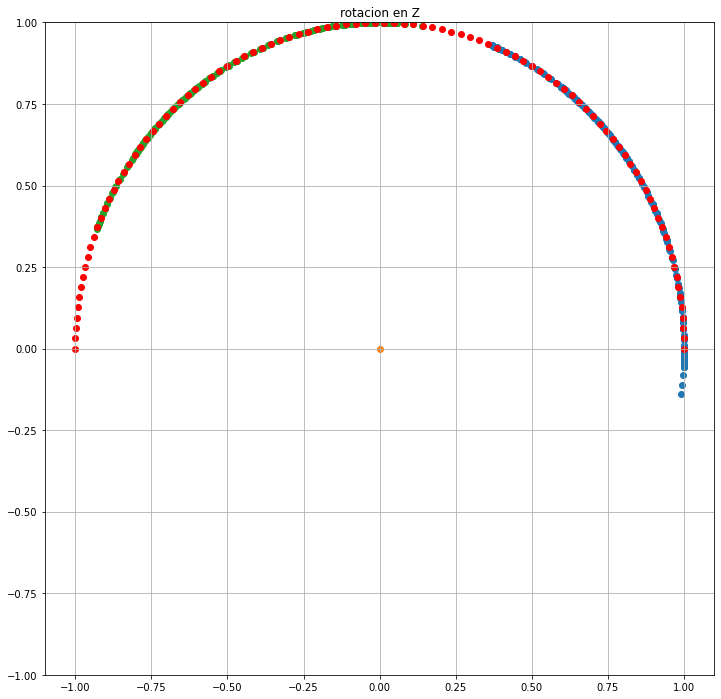

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( )
for i in range(0,len(pos)):
  ax.scatter(pos[i][0],  pos[i][2])
ax.scatter(np.cos(x), np.sin(x), c = "r")     
plt.grid(visible = True)
ax.set_title("rotacion en Z")
ax.set_ylim([-1,1])
plt.show()

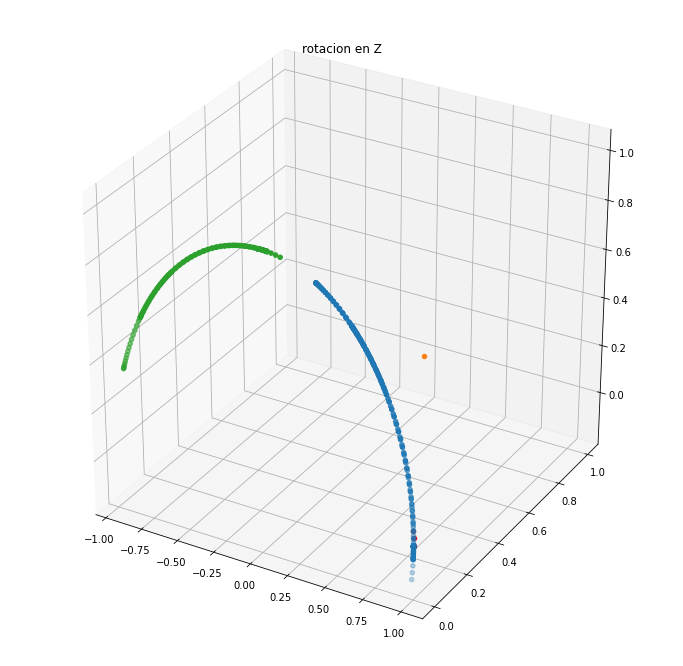

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(pos)):
  ax.scatter(pos[i][0], pos[i][1], pos[i][2])
  ax.scatter( np.cos(x[i]), 0 , np.sin(x[i]), c= "r")       
plt.grid(visible = True)
ax.set_title("rotacion en Z")
plt.show()

In [ ]:
x

array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
       0.1586663 , 0.19039955, 0.22213281, 0.25386607, 0.28559933,
       0.31733259, 0.34906585, 0.38079911, 0.41253237, 0.44426563,
       0.47599889, 0.50773215, 0.53946541, 0.57119866, 0.60293192,
       0.63466518, 0.66639844, 0.6981317 , 0.72986496, 0.76159822,
       0.79333148, 0.82506474, 0.856798  , 0.88853126, 0.92026451,
       0.95199777, 0.98373103, 1.01546429, 1.04719755, 1.07893081,
       1.11066407, 1.14239733, 1.17413059, 1.20586385, 1.23759711,
       1.26933037, 1.30106362, 1.33279688, 1.36453014, 1.3962634 ,
       1.42799666, 1.45972992, 1.49146318, 1.52319644, 1.5549297 ,
       1.58666296, 1.61839622, 1.65012947, 1.68186273, 1.71359599,
       1.74532925, 1.77706251, 1.80879577, 1.84052903, 1.87226229,
       1.90399555, 1.93572881, 1.96746207, 1.99919533, 2.03092858,
       2.06266184, 2.0943951 , 2.12612836, 2.15786162, 2.18959488,
       2.22132814, 2.2530614 , 2.28479466, 2.31652792, 2.34826

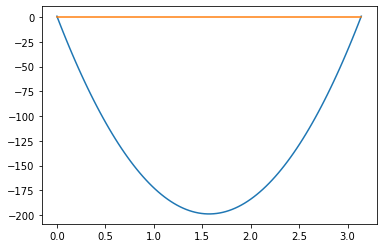

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, Kappexp)
plt.show()